# попробуем почекать всякие задачки

## init

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (17,8)
plt.style.use('ggplot')

np.random.seed(42)

## лапша

**Задача:**  

У нас есть кастрюля с макаронинами. Мы берем два конца, связываем. Каково мат. ожидание кол-ва колец?

**Решение:**  

Идея: на каждом шаге мы уменьшаем кол-во макаронин на одну. Что бы не случилось: завязали мы петлю, или связали две макаронины, их становится на одну меньше (две связанных макаронины дают одну, просто в два раза длиннее). И процесс продолжается до тех пор, пока не останется двух свободных концов. Т.е. ряд кол-ва макаронин будет такой: $n, n-1, n-2, ..., 2, 1$  

Вероятность получить кольцо на каждом шаге - $\frac{1}{m}$, где $m$ - кол-во макаронин на данном шаге. Почему? Ну идея такая: мы берем 1 конец, а потом ищем ещё один конец. Этот второй конец будет принадлежать одной из $m$ макаронин, имеющимся на этом шаге. Так вот, кольцо получится только в том случае, если этот второй конец принадлежит той же макаронине, что и первый вытянутый конец. А способов вытянуть его - один из $m$.  

Получается, что мы с вероятностью $\frac{1}{n}$ получим кольцо на первом шаге, с вероятностью $\frac{1}{n-1}$ - на втором и т.д. На предпоследнем шаге это будет $\frac{1}{2}$, на последнем - $\frac{1}{1}=1$: в конце мы точно получаем кольцо.  

Работать с изменчивыми вероятностями я не умею. Хочется привести к схеме Бернулли. И вот я не знаю, насколько это правильно. Но мне хочется думать, что можно взять "среднюю" вероятность кольца. Попробуем.  

Для начала посмотрим, как по факту получается:

In [4]:
def true_setting(n, runs=500, plot=True):
    circles = []
    for r in range(runs):
        counter = 0
        for i in range(1, n+1):
            v = np.random.uniform(low=0.0, high=1.0)
            if v < (1/i):
                counter += 1
        circles.append(counter)
    
    mean = np.mean(circles)
    
    if plot:
        ax = plt.axes()
        ax.hist(circles, bins=50, alpha=0.5)
        ax.axvline(mean, label=f'mean={mean}')
        ax.legend()
        plt.show();
        
    return mean

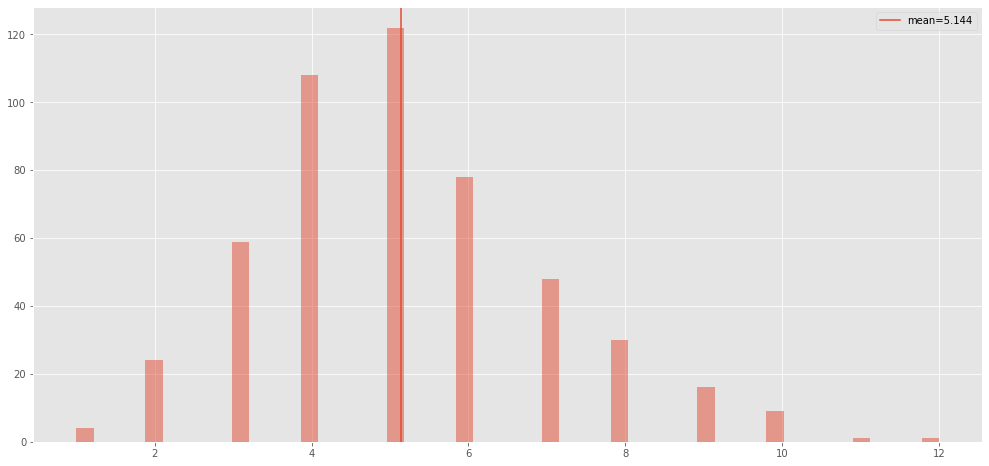

5.144

In [5]:
true_setting(n=100, runs=500)

Теперь о среднем. Посчитаем его в лоб:

In [20]:
def mean_p(n):
    ps_sum = 0
    for i in range(1, n+1):
        ps_sum += (1/i)
        
    return ps_sum / n

In [21]:
mean_p(n=100)

0.05187377517639621

Что дальше делать со средней вероятностью - понятно: по формуле для биномиального распределения мат. ожидание будет $np$. При $n=100$ и $p \approx 0.05$ получается $\approx 5$, что соответствует нарисованному выше графику.  

Вроде норм. Почекаем на других примерах:  

In [23]:
n = 1000

experiment_mean = true_setting(n, runs=500, plot=False)
theory_mean = mean_p(n) * n

experiment_mean, theory_mean

(7.646, 7.485470860550343)

Похоже на правду. Остается понять, как выразить среднюю вероятность через $n$.  

А нам тут поможет, оказывается, сумма первых $n$ [гармонических чисел](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D1%80%D0%BC%D0%BE%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%87%D0%B8%D1%81%D0%BB%D0%BE). И там получается так:  
$$\sum_{k=1}^n \frac{1}{k} \approx \ln{n} + \gamma $$  

Где $ \gamma $ - это [постоянная Эйлера — Маскерони](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%BD%D0%B0%D1%8F_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%81%D0%BA%D0%B5%D1%80%D0%BE%D0%BD%D0%B8).  

Остается только поделить потом это на $n$, и получаем среднюю вероятность.

Пробуем:  

In [37]:
def mean_p_theory(n): 
    # from sympy.core.numbers import EulerGamma
    EulerGamma = 0.5772156649
    p_sum = np.log(n) + EulerGamma
    return p_sum / n

In [41]:
n = 10000

experiment_mean = true_setting(n, runs=500, plot=False)
theory_mean = mean_p_theory(n) * n

experiment_mean, theory_mean

(9.84, 9.787556036876182)

Штош, похоже )  

Итого: средняя вероятность - это рабочий варик. А эксперимент Бернулли нас вовсе никогда не подведет. Ну и последняя составляющая успеха - гармонические числа.

## три броска кубика

**Задача:**  

Каково мат. ожидание очков, если можно кинуть кубик три раза? Ну т.е. можно перебросить.  

**Решение:**  

Для начала надо определиться со статегией. И это нам поможет сделать расчет матожидания одного броска:  

In [6]:
(1 + 2 + 3 + 4 + 5 + 6) / 6

3.5

Итак, единичный бросок дает нам в среднем 3.5 очка. Значит, если выпадет 4-6 - можно и не перебрасывать. А вот 1-3 - лучше перебросить, возможно выбьем больше.  

## театр и гардеробы